## Data Science Discovering Structure and Opportunity via Network Modeling 
![](images/twittercloud.jpg)

In [11]:
###lets take a peek 
import requests
import html
import subprocess
from IPython.display import display, HTML, IFrame
screen_name = "CarlsonNews"
html_template = html.escape(requests.get('https://twitter.com/{}'.format(screen_name)).text)
display(HTML("<iframe srcdoc='{}' height='600' width='1000'>".format(html_template)))

## What the profile page looks like to a computer using API (Application Programming Interface)

In [12]:

###get profile page
import sys
import os
import importlib
sys.path.insert(0,"twitterpackage/Chap02_03")
#print(sys.path)
#print(os.environ)

from twitter_client import get_twitter_client
import json
client = get_twitter_client()
profile = client.get_user(screen_name=screen_name)
print(json.dumps(profile._json, indent =4))

{
    "id": 249171933,
    "id_str": "249171933",
    "name": "Carlson School of Management",
    "screen_name": "CarlsonNews",
    "location": "Minneapolis",
    "profile_location": null,
    "description": "Official Twitter account of the Carlson School of Management at the University of Minnesota.",
    "url": "https://t.co/F7zi7sypNp",
    "entities": {
        "url": {
            "urls": [
                {
                    "url": "https://t.co/F7zi7sypNp",
                    "expanded_url": "http://carlsonschool.umn.edu",
                    "display_url": "carlsonschool.umn.edu",
                    "indices": [
                        0,
                        23
                    ]
                }
            ]
        },
        "description": {
            "urls": []
        }
    },
    "protected": false,
    "followers_count": 5008,
    "friends_count": 971,
    "listed_count": 171,
    "created_at": "Tue Feb 08 14:39:26 +0000 2011",
    "favourites_count": 809,

## Lets look at some basic questions relating to Sysco
* ### What topics are being Tweeted on the Front page this year?
* ### How Wide is the Social Media Reach of Sysco?
* ### Who are the influencers in their social media network?


In [13]:
#cmd = "python twitterpackage/Chap02_03/twitter_get_user.py {}".format(screen_name)
#print(subprocess.check_output(cmd, shell=True).decode())

#cmd = "python ./twitterpackage/Chap02_03/twitter_get_user_timeline_daterange.py --username {} --startdate {}".format(screen_name,"2018-01-01")
#print(subprocess.check_output(cmd, shell=True).decode())

In [14]:
print("what hashtag topics are on {}'s mind?".format(screen_name))
cmd = "python twitterpackage/Chap02_03/twitter_hashtag_frequency.py user_timeline_{}.jsonl".format(screen_name)
print(subprocess.check_output(cmd, shell=True).decode())


what hashtag topics are on CarlsonNews's mind?
umnproud: 53
1sttuesday: 25
umnwlc: 13
waywework: 10
techcitiesmn: 10
brandmatters: 8
gophergratitude: 5
sblii: 5
umn: 4
umnalumni: 4
umn22: 3
carlsongrad: 3
miliconvene: 2
umncampus: 2
gophers: 2
gigeconomy: 2
minnesota: 2
hatsoff: 2
superbowl: 2
carlsonmba: 1
umndriven: 1
equityandleadership: 1
halloween: 1
nationalpumpkinday: 1
tcsw18: 1
throwbackthursday: 1
umndayofservice: 1
nationalcoffeeday: 1
fall: 1
fridayfeeling: 1
september11: 1
neverforget: 1
collegecolorsday: 1
firsttuesday: 1
july4th: 1
umnresearch: 1
memorialday: 1
navigatingthegigeconomy: 1
graduationadvicein5words: 1
alumniwordsofwisdom: 1



In [15]:
print("What do the follower statistics look like for {}?".format(screen_name))
cmd = "python twitterpackage/Chap02_03/twitter_followers_stats.py {}".format(screen_name)
print(subprocess.check_output(cmd, shell=True).decode())

What do the follower statistics look like for CarlsonNews?
----- Timing -----
Initialize data: 0.30281591415405273
Set-based operations: 0.2559967041015625
Total time: 0.5588126182556152
----- Stats -----
CarlsonNews has 5008 followers
CarlsonNews has 971 friends
CarlsonNews has 567 mutual friends
404 friends are not following CarlsonNews back
4441 followers are not followed back by CarlsonNews
Some mutual friends: annamariapitera, Kaseyannt, chrisfritchkw, GRLitman, umnarchives



In [ ]:
###lets get all sysco mutual friends (only run once)
print("Lets pull the mutual friends for {}".format(screen_name))
cmd = "python twitterpackage/Chap02_03/twitter_mutual_friend_followers.py {}".format(screen_name)
print(subprocess.check_output(cmd, shell=True).decode())

Lets pull the mutual friends for CarlsonNews?


In [7]:
####Generate Mutual Friend Network
####These are the interconnections
import os
import sys
import json
import time
import math
from tweepy import Cursor
from twitter_client import get_twitter_client
import sys
import json
from random import sample
import sys
import json
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
import urllib
import requests
import html

Refresh = True
Target = screen_name
if Refresh == True:
    followers_file = 'users/{}/followers.jsonl'.format(Target)
    friends_file = 'users/{}/friends.jsonl'.format(Target)
    with open(followers_file) as f1, open(friends_file) as f2:
        t0 = time.time()
        followers = []
        friends = []
        for line in f1:
            profile = json.loads(line)
            followers.append(profile['screen_name'])
        for line in f2:
            profile = json.loads(line)
            friends.append(profile['screen_name'])
        t1 = time.time()
        mutual_friends = [user for user in friends if user in followers]
        followers_not_following = [user for user in followers if user not in friends]
        friends_not_following = [user for user in friends if user not in followers]
        t2 = time.time()
        print("Building Mutual Friend Network for {} Who Has {} Mutual Friends".format(Target, len(mutual_friends)))

    #mutual_friends = mutual_friends[:5]
    G = nx.DiGraph()
    for mutual in mutual_friends:
        #G.add_edge(screen_name,mutual)
        #G.add_edge(mutual,screen_name)
        G.add_node(mutual)

    ###Link the mutual friends network to Sysco
    for mutual in mutual_friends:
        screen_name = mutual
        followers_file = 'users/{}/followers.jsonl'.format(screen_name)
        friends_file = 'users/{}/friends.jsonl'.format(screen_name)
        try:
            with open(followers_file) as f1, open(friends_file) as f2:
                followers = []
                friends = []
                for line in f1:
                    profile = json.loads(line)
                    followers.append(profile['screen_name'])
                ###Add to the NetworkX Graph those that are connected
                followers_in_network = list(set(followers).intersection(mutual_friends))
                for u in followers_in_network:
                    G.add_edge(u,screen_name)
                print("{} followers in network for {}".format(len(followers_in_network),screen_name))

                for line in f2:
                    profile = json.loads(line)
                    friends.append(profile['screen_name'])
                ###Add to the NetworkX Graph those that are connected
                friends_in_network = list(set(friends).intersection(mutual_friends))
                for u in friends_in_network:
                    G.add_edge(screen_name,u)
                print("{} friends in network for {}".format(len(friends_in_network),screen_name))
        except OSError:
            print("no file there for {}, removing node".format(screen_name))
            G.remove_node(screen_name)
    nx.write_gpickle(G,"networkX{}.gpickle".format(Target))
else:
    G = nx.read_gpickle("networkX{}.gpickle".format(Target))

displaylabel = {n:'@' + n for n in G.nodes()}

Building Mutual Friend Network for CarlsonNews Who Has 567 Mutual Friends
no file there for a_f13nd, removing node
no file there for UMN_CCAPS, removing node
no file there for UMN_Give, removing node
no file there for UMNRecWell, removing node
no file there for umncla, removing node
no file there for UMNGovRelations, removing node
no file there for JonHigherEd, removing node
no file there for uofmnbookstores, removing node
no file there for UCard, removing node
no file there for boyntonhealth, removing node
no file there for UMNOneStop, removing node
no file there for umnarchives, removing node
no file there for umnlib, removing node
no file there for MAHRIRAlumni, removing node
no file there for UMNCAPE, removing node
no file there for RSDPMN, removing node
no file there for LearningLife, removing node
no file there for UMN_ALL, removing node
no file there for mnwomenscenter, removing node
no file there for UMNStatistics, removing node
no file there for isssumn, removing node
no file 

In [8]:
#!pip install py2cytoscape
#!pip install visJS2jupyter

In [9]:
#!ls /usr/local/lib/python3.6/site-packages/visJS2jupyter

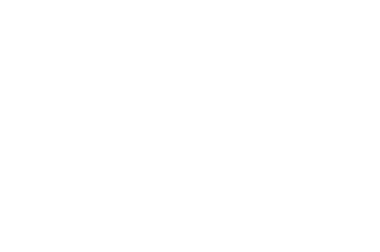

In [10]:
import matplotlib
import visJS2jupyter.visJS_module

#Create network layout for visualizations
pos = nx.spring_layout(G , scale= 1)

plt.axis("off")
nx.draw_networkx(G, pos = pos, with_labels = False, arrows=False, node_size = 35)

In [ ]:
nodes = G.nodes()
edges = list(G.edges())
nodes_dict = [{"id":n,
               "color":'black',
              "title": displaylabel[n],
               "displaylabel":n,
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

edges_dict = [{"source":node_map[edges[i][0]], 
               "target":node_map[edges[i][1]], 
              "color":"gray"
              } for i in range(len(edges))]

# set some network-wide styles
NodeGraph = visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_label_field='displaylabel',
                          node_size_multiplier=10,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_label_field='label',
                          edge_title_field='title',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id = 1)

NodeGraph

In [ ]:
###lets find the most central 5 members in the network
###using betweenness centrality
bt = nx.betweenness_centrality(G)
nx.set_node_attributes(G, name='betweenness', values=bt)
nx.set_node_attributes(G, name='size', values=5)
nx.set_node_attributes(G, name='color', values="black")

###number of influencers to identify
top = 5
max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]

influencerlabel = displaylabel

for max_key, max_val in max_nodes:
    G.node[max_key]['size'] = 15
    G.node[max_key]['color'] = 'yellow'
    html_template = html.escape(requests.get('https://twitter.com/{}'.format(max_key)).text)
    influencerlabel[max_key] = "<iframe srcdoc='{}' height='600' width='800'>".format(html_template)
    

color = nx.get_node_attributes(G,'color')
size = nx.get_node_attributes(G,'size')


nodes = G.nodes()
edges = list(G.edges())
nodes_dict = [{"id":n,
               "color":color[n],
              "title": influencerlabel[n],
              #"displaylabel":n,
              "degree":size[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

edges_dict = [{"source":node_map[edges[i][0]], 
               "target":node_map[edges[i][1]], 
              "color":"gray"
              } for i in range(len(edges))]

# set some network-wide styles
NodeGraphInfluencer = visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          tooltip_delay=300,
                          node_label_field='displaylabel',
                          node_size_multiplier=10,
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_label_field='label',
                          edge_title_field='title',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id = 2)

NodeGraphInfluencer

In [ ]:
import community

Gc = G.to_undirected()
parts = community.best_partition(Gc)
ranges = list(set([parts.get(node) for node in Gc.nodes()]))

nx.set_node_attributes(Gc, name='community', values=parts)
nx.set_node_attributes(Gc, name='size', values=5)

influencerlabel = displaylabel
for c in ranges:
    bunches = [k for k,v in nx.get_node_attributes(Gc,name='community').items() if v == c]
    if len(bunches) > 1:
        bt = nx.betweenness_centrality(G.subgraph(bunches))
        ###number of influencers to identify
        top = 1
        max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
        for max_key, max_val in max_nodes:
            Gc.node[max_key]['size'] = 15
            Gc.node[max_key]['color'] = 'yellow'
            html_template = html.escape(requests.get('https://twitter.com/{}'.format(max_key)).text)
            influencerlabel[max_key] = "<iframe srcdoc='{}' height='600' width='800'>".format(html_template)
            

color = visJS2jupyter.visJS_module.return_node_to_color(Gc,field_to_map='community',cmap=plt.get_cmap("prism"))
size = nx.get_node_attributes(Gc,'size')

nodes = Gc.nodes()
edges = list(Gc.edges())
nodes_dict = [{"id":n,
               "color":color[n],
              "title": influencerlabel[n],
              #"displaylabel":n,
              "degree":size[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

edges_dict = [{"source":node_map[edges[i][0]], 
               "target":node_map[edges[i][1]], 
              "color":"gray"
              } for i in range(len(edges))]

# set some network-wide styles
NodeGraphInfluencer = visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                           tooltip_delay=300,
                          node_label_field='displaylabel',
                          node_size_multiplier=10,
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_label_field='label',
                          edge_title_field='title',
                          edge_width=1,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id = 3)

NodeGraphInfluencer